In [10]:
import pandas as pd
import numpy as np
import time 
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
from datetime import datetime, timedelta
import ccxt
exchange = ccxt.binance()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from hmm import load_and_preprocess_data

print('Starting main execution')
file_path = r'C:\Users\joshd\OneDrive - Monash University\Projects\Python\Trading\Intro_using_AI\data\btc_1h_5years.csv'
data = load_and_preprocess_data(file_path)

Starting main execution
Loading data from C:\Users\joshd\OneDrive - Monash University\Projects\Python\Trading\Intro_using_AI\data\btc_1h_5years.csv...
Creating datetime index...
Calculating returns and volatility...
Calculating volume change...
Dropping NaN values...
Performing data quality checks...
Returns:
  Infinite values: 0
  NaN values: 0
  Max value: 0.12315895662199172
  Min value: -0.08954470284237714

Volatility:
  Infinite values: 0
  NaN values: 0
  Max value: 0.03405497677132304
  Min value: 0.00045462061190549175

Volume_Change:
  Infinite values: 0
  NaN values: 0
  Max value: 3.3296608684494413
  Min value: -1.0

Data preprocessed. Shape: (43783, 9)


In [12]:
from hmm import train_hmm

print("Training HMM model")
model, scalar = train_hmm(data)

Training HMM model
Training HMM with 3 components...
Normalizing features...
Fitting HMM model...
HMM training completed.


In [13]:
from hmm import predict_states

print("Predicting States")
states = predict_states(model, data, scalar)

Predicting States
Predicting states...
States predicted. Unique states: [0 1 2]


In [14]:
from hmm import analyze_states

print("Analysing states")
analyze_states(data, states, model)

Analysing states
Analyzing states...

Analyzing State 0:
            Returns    Volatility  Volume_Change
count  27659.000000  27659.000000   27659.000000
mean       0.000086      0.004086      -0.069495
std        0.002723      0.001560       0.314527
min       -0.008823      0.000455      -0.884403
25%       -0.001611      0.002903      -0.297601
50%        0.000052      0.004093      -0.099189
75%        0.001777      0.005287       0.131090
max        0.008892      0.008759       0.985796
Number of periods in State 0: 27659

Analyzing State 1:
           Returns   Volatility  Volume_Change
count  5609.000000  5609.000000    5609.000000
mean     -0.000056     0.004815       1.173495
std       0.009928     0.001584       0.909703
min      -0.054153     0.000492      -0.813997
25%      -0.007563     0.003694       0.595431
50%      -0.000182     0.004955       0.997477
75%       0.007250     0.006018       1.600362
max       0.055275     0.011637       3.329661
Number of periods in St

Plotting results...


c:\Users\joshd\OneDrive - Monash University\Projects\Python\Trading\Intro_using_AI\hmm\3_indis\hmm.py:144: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\joshd\OneDrive - Monash University\Projects\Python\Trading\Intro_using_AI\hmm\3_indis\hmm.py:145: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  print("Showing plot...")


Plot saved as hmm_results.png
Showing plot...


C:\Users\joshd\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


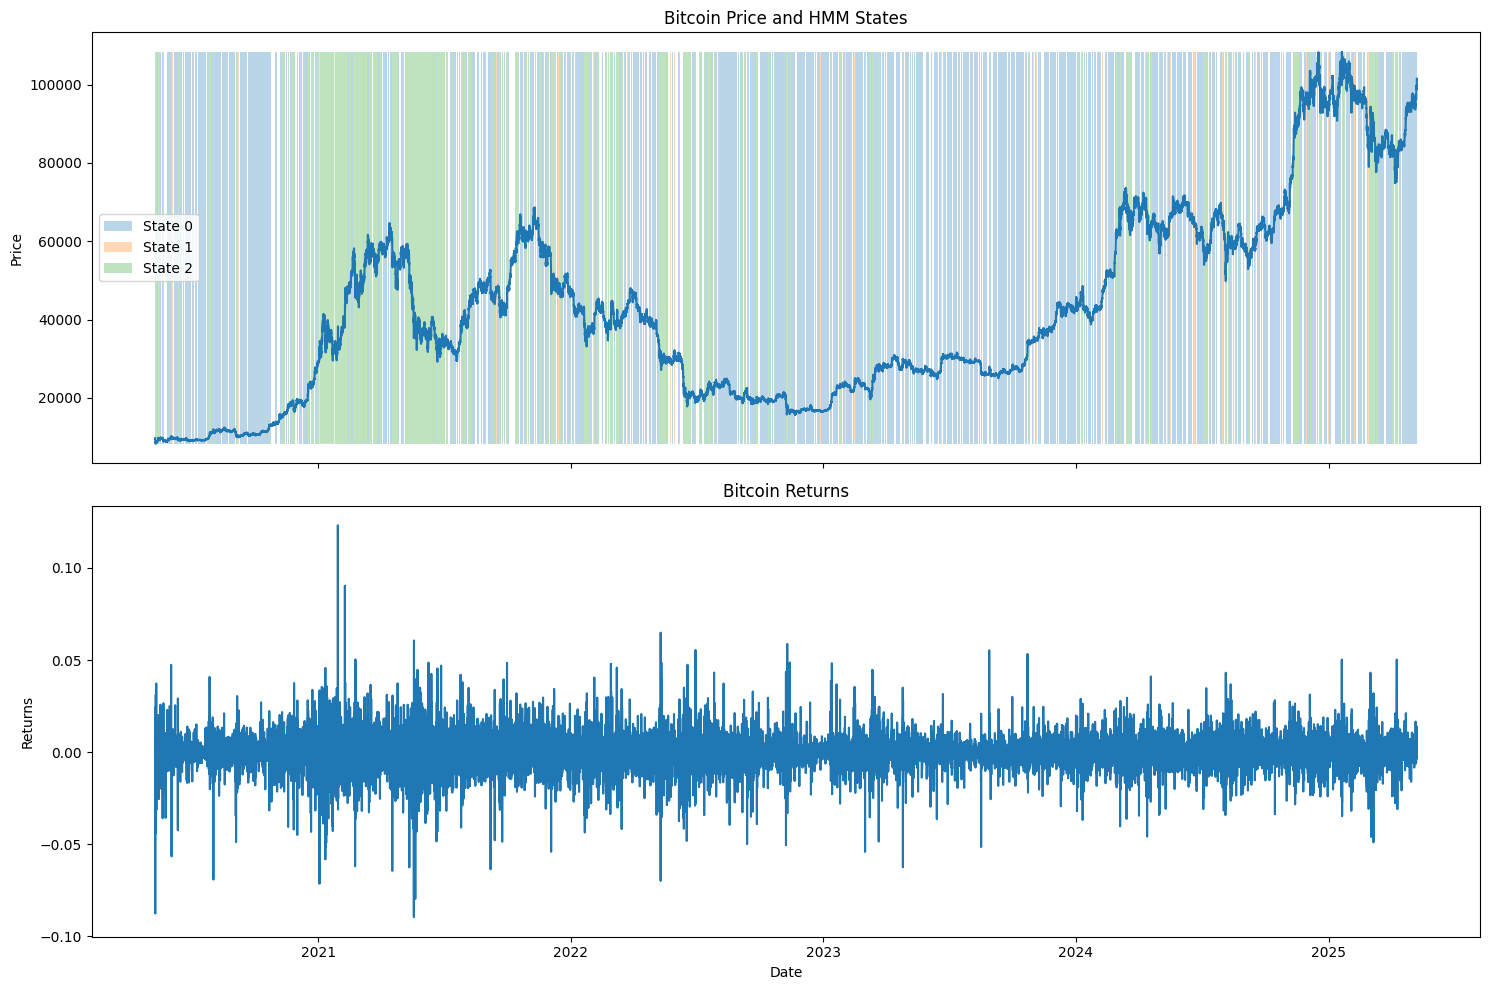

In [15]:
from hmm import plot_results

plot_results(data, states, model)

In [16]:
print("Printing transition matrix...")
print("Transition Matrix")
print(model.transmat_)

Printing transition matrix...
Transition Matrix
[[8.07127776e-01 1.92872224e-01 7.10894634e-17]
 [7.53210910e-01 2.08980248e-01 3.78088418e-02]
 [1.26115647e-02 1.19148382e-02 9.75473597e-01]]


In [17]:
print("\nPrinting means and covariances of each state...")
for i in range(model.n_components):
    print("State", i, ":")  # Fixed to show the actual state number
    print("Mean:", model.means_[i])  # Added index [i]
    print("Covariance:", model.covars_[i])  # Added index [i]
    print()

print("Bitcoin HMM analysis completed.")


Printing means and covariances of each state...
State 0 :
Mean: [ 0.00132245 -0.46551227 -0.30797276]
Covariance: [[ 0.16953902  0.00345106 -0.00505621]
 [ 0.00345106  0.21098178 -0.0241659 ]
 [-0.00505621 -0.0241659   0.24704251]]

State 1 :
Mean: [-0.01102683 -0.23309352  1.34799249]
Covariance: [[ 1.96052038  0.01292046  0.01355848]
 [ 0.01292046  0.21431422 -0.12277115]
 [ 0.01355848 -0.12277115  2.2289405 ]]

State 2 :
Mean: [ 0.00371629  1.36098134 -0.07407961]
Covariance: [[ 2.53502165  0.03576487 -0.13332258]
 [ 0.03576487  1.10949712  0.02127683]
 [-0.13332258  0.02127683  0.72886401]]

Bitcoin HMM analysis completed.
